# 과제
1. manual seed(1024)를 이용하여 seed를 고정한 상태에서 negative prompt를 사용하여 수염이 없는 남자 사진을 만들기
- 사진을 생성할 때, 내가 원하지 않는 부분을 제외하고 만들고 싶다면?
- (positive) prompt, negative prompt를 이용하여 만드는 사진에 넣고 싶은 요소와 빼고 싶은 요소를 디퓨전 모델에 입력
- diffusers pipeline github https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py 참조
- prompt는 "a man wearing fedora"를 사용
- 전후 이미지 관계(수염이 있다가 사라진 상태)가 명확히 보여야 함

2. 주어진 pose 사진을 사용하여 ControlNet으로 사진 생성하기
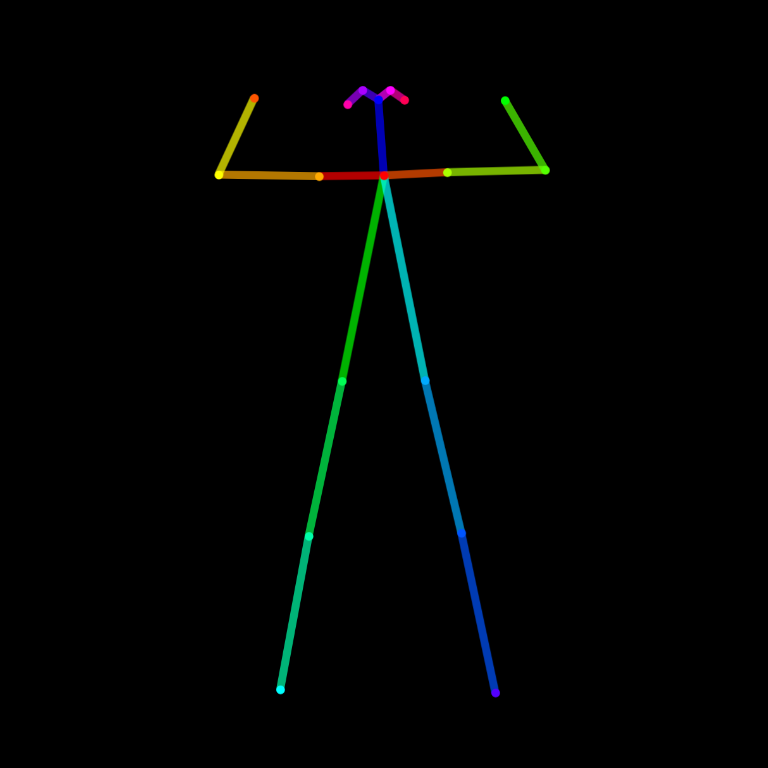
3. 주어진 사진을 사용하여 inpainting 수행하기
- 사진은 가상대학에 업로드된 것을 사용
- mask는 https://huggingface.co/spaces/r3gm/inpaint-mask-maker에서 마스크를 직접 생성
- prompt는 자유롭게 사용
- 이미지와 mask, 생성 결과를 plot

### Task 1

In [1]:
%pip install huggingface_hub
%pip install diffusers
%pip install transformers
%pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 40.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.2
    Uninstalling huggingface-hub-0.19.2:
      Successfully uninstalled huggingface-hub-0.19.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.2 MB/s eta 0:00:00


In [2]:
# diffusers에서 stable diffusion model을 사용하기 위해 token을 받아옵니다.
from huggingface_hub import login

login()

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

# diffusion model의 이미지 생성 과정이 pipe 안에서 전부 이루어집니다.
# 이번 실습에서는 stable diffusion 1.5를 사용
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

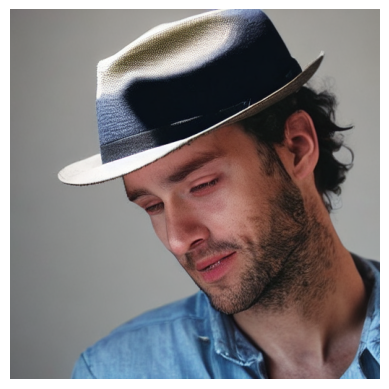

In [19]:
prompt = "a man wearing fedora"
# generator를 사용하여 시드값 설정 : 1024
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

plt.axis('off')
plt.imshow(image)
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

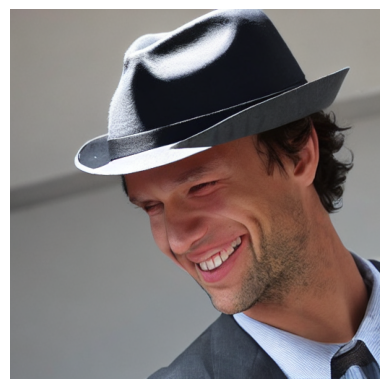

In [20]:
prompt = "a man wearing fedora"

# generator를 사용하여 시드값 설정 : 1024
generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, negative_prompt = "mustache and beard", generator=generator).images[0]

plt.axis('off')
plt.imshow(image)
plt.show()

### Task 2

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

torch.cuda.empty_cache()

# diffusers에서 controlnet 모델을 불러옵니다.
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [78]:
from PIL import Image

pose_image = Image.open('/content/drive/MyDrive/pose.png')

In [90]:
prompt = "iron man, best quality"

output = pipe(
    prompt,
    pose_image,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

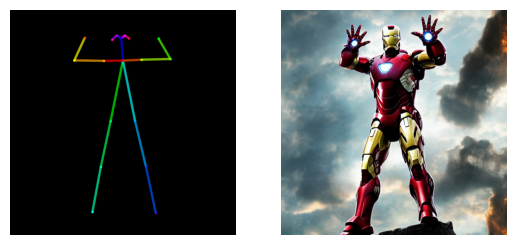

In [91]:
# 스케치 이미지와 생성 결과물을 plot합니다.

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(pose_image)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(output)
plt.show()

### Task 3

In [92]:
import torch
from diffusers import StableDiffusionInpaintPipeline
import PIL
import requests
from io import BytesIO

torch.cuda.empty_cache()

# inpainting pipeline 불러오기
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [114]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

# url로부터 예시 이미지를 다운로드하고 512 x 512 크기로 맞추기
img_url = "https://cdn-uploads.huggingface.co/production/uploads/noauth/HOnJD5l81Yl_nBp9nzZGK.png"
mask_url = "https://cdn-uploads.huggingface.co/production/uploads/noauth/gYHZMZQhkugxjoDrbus9O.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [121]:
prompt = "a Dachshund"

# 파이프라인에는 프롬프트, 원본 이미지, 마스크 이미지를 입력합니다.
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

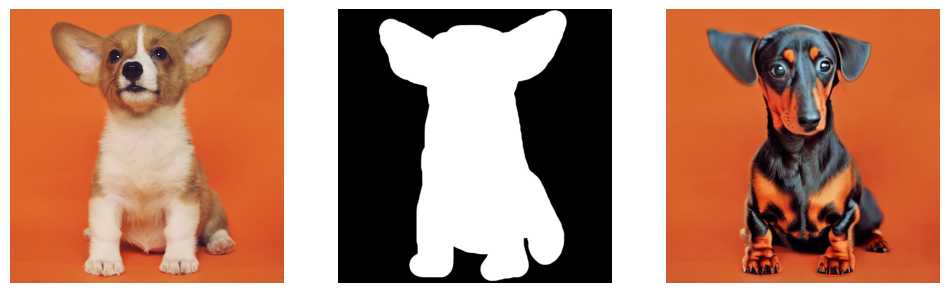

In [122]:
import matplotlib.pyplot as plt

# 실행 결과를 plot
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(init_image)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(mask_image)
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(image)
plt.show()